## Example from keras blog

### Importing packages

In [2]:
import keras
from keras import layers

### Architecture

In [12]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [13]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [14]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Importing dataset

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


### Split and Training

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
# Open terminal and type this command in order to look for training stats
# !tensorboard --logdir=/tmp/autoencoder

In [18]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0966 - val_loss: 0.0956
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0968 - val_loss: 0.0963
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0968 - val_loss: 0.0955
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0966 - val_loss: 0.0954
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0964 - val_loss: 0.0954


In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step


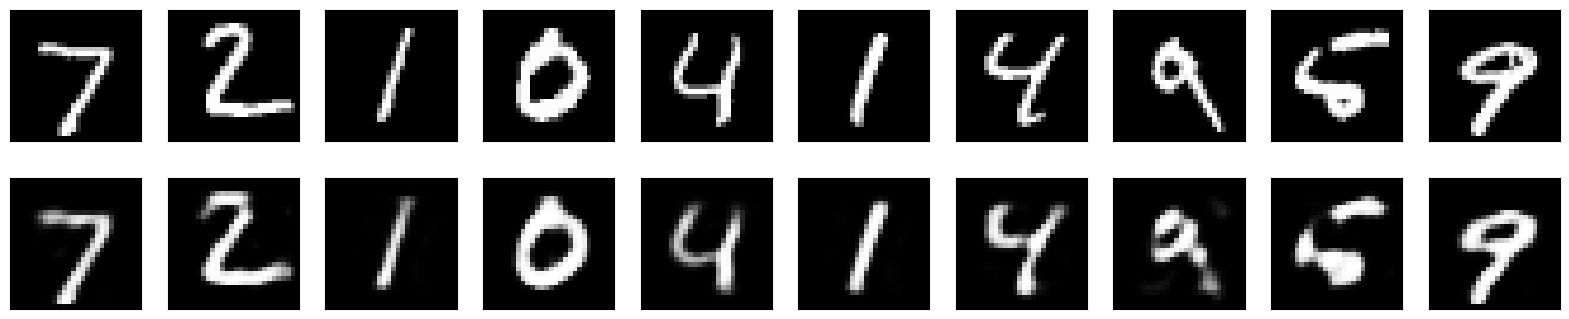

In [10]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()